<a href="https://colab.research.google.com/github/Taimaaaa/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Taima Nasser

#Utility Functions

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Explore Categorical
def explore_categorical(df, x, *, fillna=True, placeholder="MISSING",
                        figsize=(6, 4), order=None, quasi_thresh=98):
    temp_df = df.copy()
    n = len(temp_df)

    # Diagnostics BEFORE filling
    null_count = temp_df[x].isna().sum()
    null_perc  = 100 * null_count / n if n else 0.0
    vc = temp_df[x].value_counts(dropna=False)
    if vc.empty:
        most_val, most_freq, most_perc = None, 0, 0.0
    else:
        most_val  = vc.index[0]
        most_freq = int(vc.iloc[0])
        most_perc = 100 * most_freq / n if n else 0.0

    # Optional fillna
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=temp_df, x=x, order=order, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_title(f"Column: {x}")
    fig.tight_layout()

    # Print console summaries
    print(f"- NaNs: {null_count} ({null_perc:.2f}%)")
    print(f"- Unique values (incl. NaN): {df[x].nunique(dropna=False)}")
    if most_val is not None:
        print(f"- Most common: {most_val!r} → {most_freq} rows ({most_perc:.2f}%)")
        print("[!] Quasi-constant; consider dropping."
              if most_perc > quasi_thresh else "- Not constant / quasi-constant.")
    return fig, ax


# 2️⃣ Plot Categorical vs Target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):
    temp_df = df.copy()
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
    else:
        temp_df = temp_df.dropna(subset=[x])

    fig, ax = plt.subplots(figsize=figsize)

    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order,
                alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)

    # Stripplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5, size=3, zorder=0)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"{x} vs. {y}")
    fig.tight_layout()
    return fig, ax


# 3️⃣ Explore Numeric
def explore_numeric(df, x, figsize=(6,5)):
    gridspec = {'height_ratios':[0.7, 0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                             sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=axes[0])
    sns.boxplot(data=df, x=x, ax=axes[1])
    axes[0].set_title(f"Column: {x}")
    fig.tight_layout()
    plt.show()

    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100
    print(f"— NaN's Found: {null_count} ({round(null_perc,2)}%)")


# 4️⃣ Plot Numeric vs Target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4), **kwargs):
    r = df[[x, y]].corr().round(2).loc[x, y]

    fig, ax = plt.subplots(figsize=figsize)
    scatter_kws = {'ec':'white', 'lw':1, 'alpha':0.8}
    sns.regplot(data=df, x=x, y=y, ax=ax,
                scatter_kws=scatter_kws, **kwargs)

    ax.set_title(f"{x} vs. {y} (r = {r})")
    fig.tight_layout()
    plt.show()
    return fig, ax


#Project Overview

## **Part 1 — Repository & Notebook Setup**

**Objective**: Establish a GitHub repository and a starter notebook for your first portfolio project.

**Tasks**


1.   Create a GitHub account (if you don’t already have one).


2. Create a new repository to host the Part 1 project materials.

3. Prepare the Colab notebook:

    + Add Markdown cells with your full name and clear section  headers.

4. Add the notebook to GitHub (commit/push from Colab or upload the .ipynb file).

5. Submit the repository URL.

**Deliverable**: Public (or shareable) GitHub repository containing your Google Colab notebook with proper headings.

---
## **Part 2 — Data Loading & Initial Cleaning (Pandas)**

**Objective:** Use Pandas in Google Colab to load the dataset and perform foundational exploration and cleaning—work continues in the same GitHub repository created in Part 1. These portfolio projects are intended to showcase your data science skills to potential employers.

**Tasks**

1. Load the data

    - Download the dataset from the Learn platform link.

    - In the “Loading Data” section of your notebook, read the sales prediction dataset into Pandas.

    - Preview the data with df.head() and summarize structure with df.info().

2. Explore & clean the data (in the “Data Cleaning” section):

    - Report the shape (number of rows and columns).

    - List the data types of all variables.

    - Check for duplicates and drop them if present.

    - Identify missing values.

    - Decide how to handle missing values (e.g., impute, drop). Explain your rationale and apply it.

    - Verify that no missing values remain after your treatment.

    - Standardize inconsistent categorical labels (e.g., unify cat, Cat, cats).

    - For numeric columns, provide summary statistics (min, max, mean).

**Deliverables**

+ Updated Colab notebook (committed to the same GitHub repo) with:

  + “Loading Data” and “Data Cleaning” sections

  + Code cells, outputs, and brief written justifications for cleaning choices
---

## **Part 3 — Exploratory Data Analysis (EDA) & README Updates**

**Objective**: Build clear visuals to understand how features relate to the target Item_Outlet_Sales, spot strong signals for prediction, and document the most useful insights in the project README.

**Tasks**

1. Distributions (histograms)

    - Plot histograms for Item_Outlet_Sales, Item_MRP, Item_Visibility, and Item_Weight

    - Note skew/outliers and any visible “tiers”

2. Numeric features vs target

    - Use scatter/regplots for:

      - Item_MRP vs Item_Outlet_Sales

      - Item_Visibility vs Item_Outlet_Sales

      - Item_Weight vs Item_Outlet_Sales


3. Categorical overview (countplots)

    - Make a small grid of countplots for: Item_Type, Outlet_Size, Outlet_Location_Type, and Outlet_Type to check class balance.

4. Categorical features vs target (catplots)

    - Use boxplots (or median bars) for:

      - Outlet_Type vs sales

      - Outlet_Size vs sales

      - Outlet_Location_Type vs sales

    - For Item_Type, use a median bar/point plot.

5. Correlation heatmap

    - Create a heatmap for numeric features.

6. README updates

    - Add a short project description (goal, data source, tools).

    - Embed two key visuals of different types:

      - Sales by Outlet Type.

      - Item_MRP vs Sales.

**Deliverables**

- Updated Colab notebook with the required visuals (histograms, boxplots/catplots, heatmap) and notes under each figure.
- Updated README.md with a description and two interpreted key visuals.
- Committed and pushed changes to GitHub.

---

**Source:** Original dataset (Analytics Vidhya — Practice Problem: Big Mart Sales III):
https://www.analyticsvidhya.com/datahack/contest/practice-problem-big-mart-sales-iii/

**Data Dictionary**



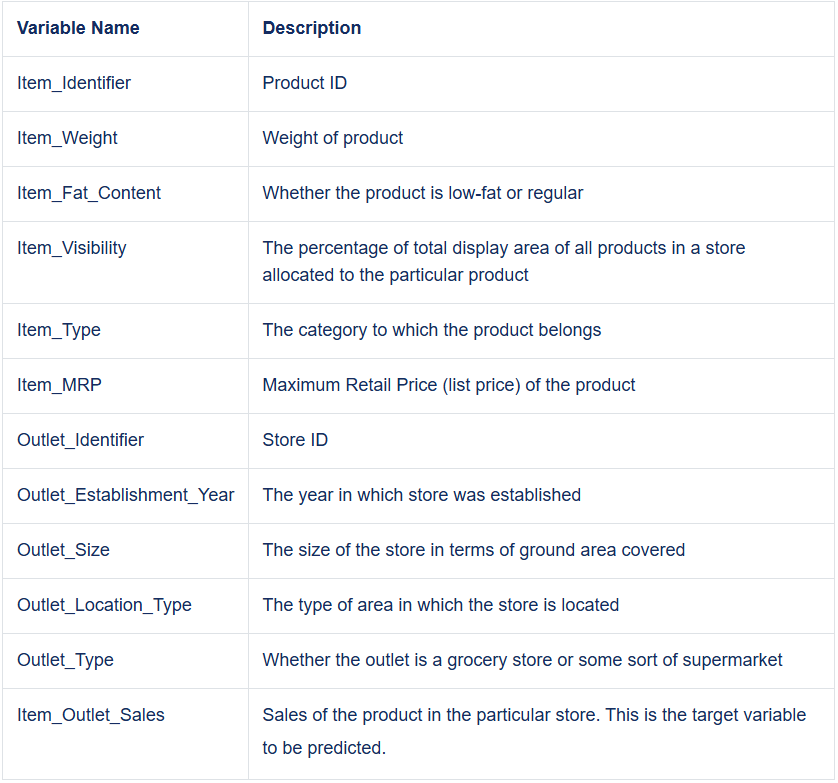


# Load and Inspect Data

In [200]:
#importing pandas and reading file
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fpath)

In [202]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [204]:
# How many rows/columns
df.shape

(8523, 12)

*   There are 8523 rows & 12 columns


In [205]:
# What are the datatypes of each variable?
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


* There are no duplicates



In [206]:
# Identify missing values.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [207]:
# Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

np.int64(0)

* We can see that Item_Weight has 1463 missing values & Outlet_Size has 2410.

In [208]:
# Address the missing values by using a placeholder value.
df["Outlet_Size"]=df["Outlet_Size"].fillna(value="MISSING")
mean_weights=df['Item_Weight'].mean()
print(mean_weights)
df["Item_Weight"]=df["Item_Weight"].fillna(value=mean_weights)

12.857645184135976


In [209]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


* We can observe that all null values have been replaced with "MISSING" placeholder in Outlet_Size
* and in Item_Weight they've been replaced with column mean

In [210]:
# Find and fix any inconsistent categories of data (for example: fixing cat, Cat, and cats so that they are consistent).
# Starting by creating objects columns dataframe
cat_cols=df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [211]:
#then looping through all objects and seeing where inconsistencies lie
for col in cat_cols:
  print (f"Counts for {col}")
  print (df[col].value_counts() )
  print( "\n" )

Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OU

* We notice in Item_Fat_Content there are two many inconsistencies where "Regular" has been written as "reg" and "Low fat" as "low fat" & "LF"

In [212]:
#Fixing the inconsistencies by replacing them
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"reg": "Regular","low fat":"Low Fat", "LF": "Low Fat"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


* All fixed!

In [213]:
# For any numerical columns, obtain the summary statistics of each (min, max. mean).
sum_stats =  df.describe()
sum_stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

In [214]:
sns.set_theme(style='whitegrid')           # clean light theme


## What is the distribution of Item_Outlet_Sales

We should first check our target sanity: how skewed is it or if any extremes are found.

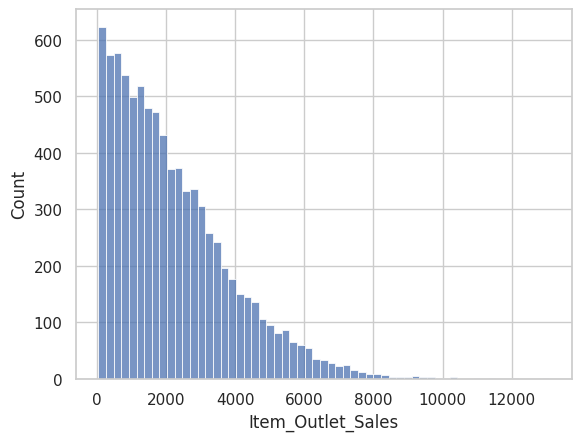

In [215]:
ax = sns.histplot(data=df, x="Item_Outlet_Sales")

The sales distribution is strongly right-skewed. Most observations lie in the lower range (roughly 0–3,500), and the frequency drops steadily as sales increase. There’s a long, thin tail extending to very high values (up to ~13,000), indicating a small number of unusually large sales.

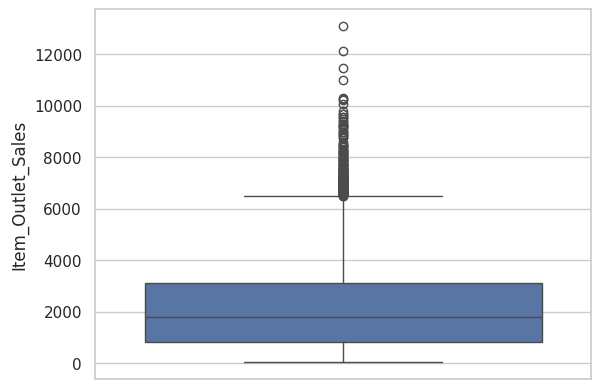

In [216]:
ax = sns.boxplot(data=df, y="Item_Outlet_Sales")

The boxplot confirms this skew. The median is around ~1,800 with an interquartile range roughly ~1,000 to ~2,900, so the “typical” sale sits near 1–3k. The upper whisker reaches ~6.5k and there are many points above it—clear high-value outliers. Overall, sales are concentrated at lower values with a handful of very large transactions driving the tail. It means our target sanity check passes!

#Numerical Features

## Numerical Features Correlation

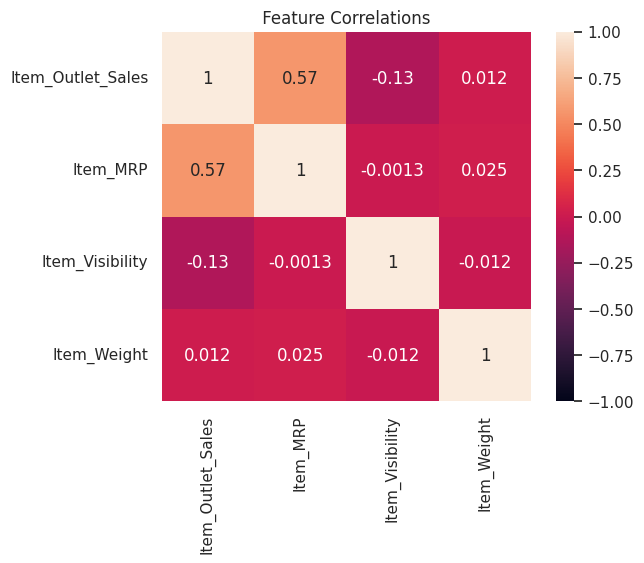

In [217]:
#use heatmap for correlation factor between the features.
num_cols = ['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility', 'Item_Weight']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, square=True)
plt.title( ' Feature Correlations ' );
plt.show()

The heatmap says that price (Item_MRP) is the only numeric feature with a clear relationship to sales (moderate positive correlation 0.57). Shelf visibility has a very weak negative link to sales (−0.13), so it might only help in certain groups or as a zero/non-zero flag. Item weight is essentially unrelated to sales (~0.01).

##How list price affect the sales

Does higher list price sell less?


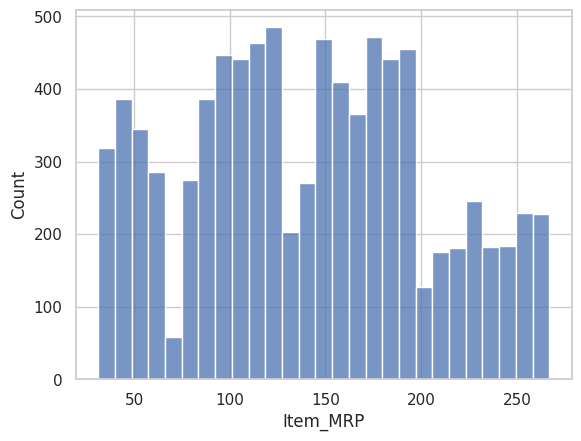

In [218]:
#first let's check distribution of MRP
ax = sns.histplot(data=df, x="Item_MRP")

Prices range roughly 30–270 and the shape is multi-peaked. You can see clear price bands (the tall bars repeat every ~40–60 units), which matches the “vertical stripes” we saw in the scatter. This means items are sold in a few common list-price tiers rather than smoothly across all prices.


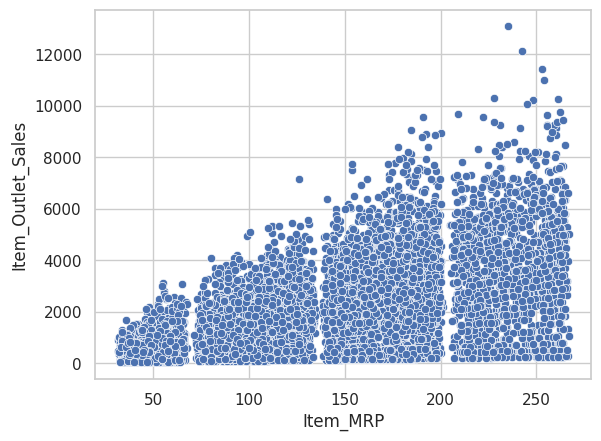

In [219]:
#Numerical vs Numerical so we should use scatter diagram
ax = sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")

As price (MRP) goes up, we see more high sales, but there’s a lot of spread at every price. The vertical “stripes” show price bands in the data. Because the cloud is dense and hard to read, we add a trend line next to see the overall direction.

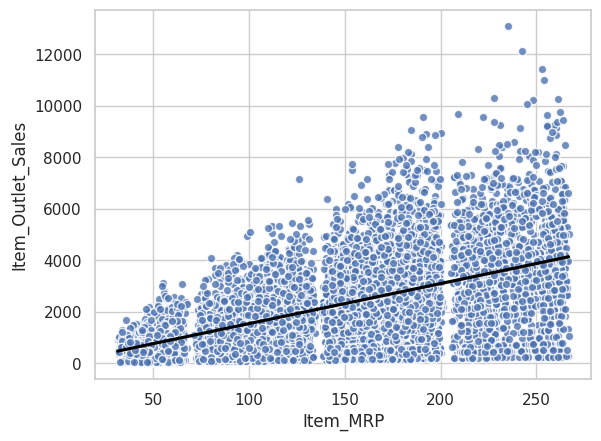

In [220]:
scatter_kws = dict(edgecolor="white")
line_kws = dict(color="black")
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

The line slopes up, so on average, higher price is linked to higher sales. But the points are very spread out—especially at higher prices—so one line can’t explain everything. This suggests other factors matter. Next, we color by outlet type to see if store format explains the spread.

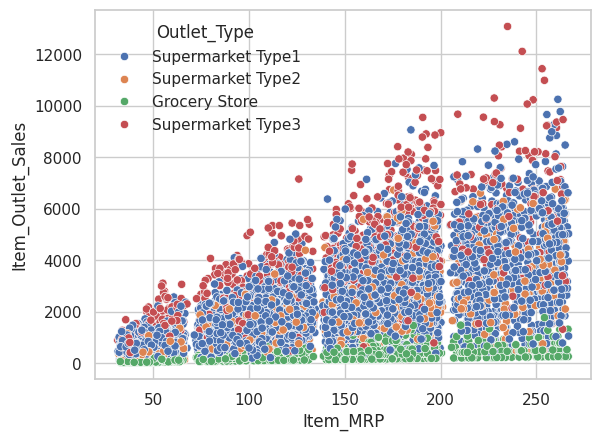

In [221]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type');

Now the pattern is clearer: Grocery Stores sit low across all prices, while Supermarket types reach much higher sales, especially at high MRPs. So, the effect of price depends on outlet type. This tells us to include outlet type (and maybe its interaction with MRP) in the prediction model.

## How shelf exposure affects sales

Does more total shelf display increase product sales?

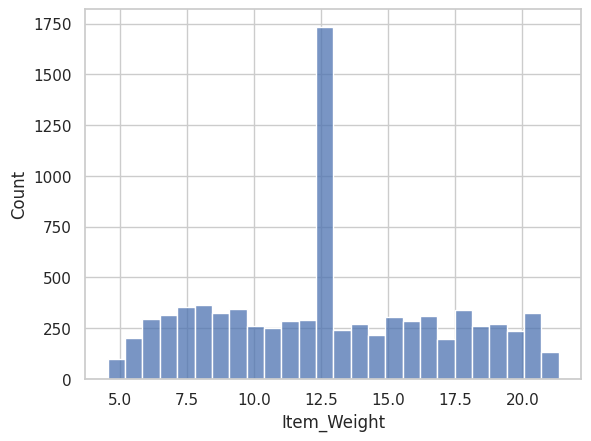

In [222]:
#again let's start with histogram for the distribution
ax = sns.histplot(data=df, x="Item_Weight")

Weights mostly fall between 5 and 21, but there’s a big spike around 12–13. That suggests many items share the same recorded weight—often a default/imputed value or a very common pack size. The rest of the distribution is fairly flat, so weight alone may not explain sales well.

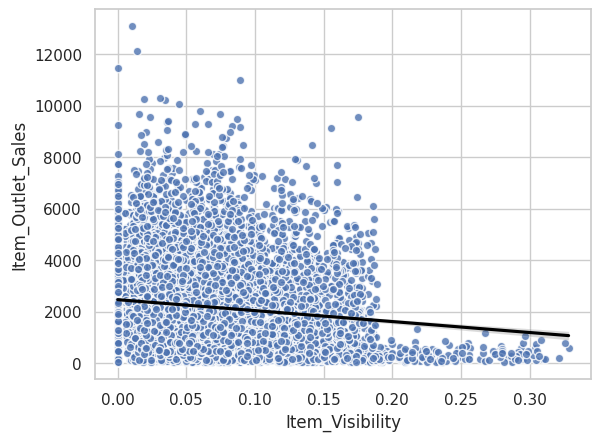

In [223]:
#also numeric vs numeric so regplot
scatter_kws = dict(edgecolor="white")
line_kus = dict(color="black")
sns.regplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

This scatter shows Item_Visibility vs Item_Outlet_Sales. Most points sit near very low visibility, and the trend line tilts slightly downward, meaning higher recorded visibility is linked with slightly lower sales on average. But the cloud is very wide at every visibility level, so the relationship is weak. In short: visibility doesn’t explain sales much on its own.

#How product weight affects sales

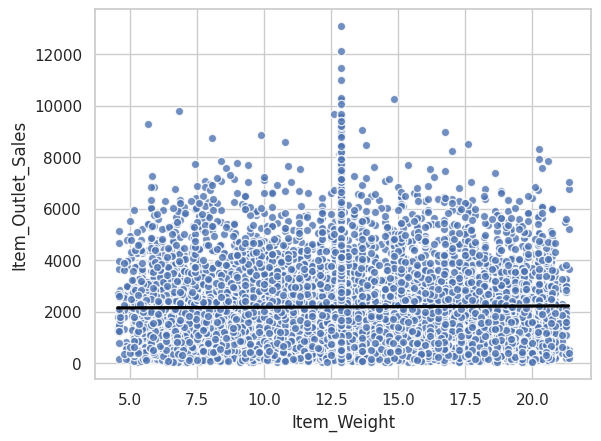

In [224]:
#also numeric vs numeric so regplot
scatter_kws = dict(edgecolor="white")
line_kws = dict(color="black")
sns.regplot(data=df, x='Item_Weight', y='Item_Outlet_Sales', scatter_kws=scatter_kws, line_kws=line_kws);

Sales don’t change much as weight increases. The trend line is almost flat, and there’s a wide spread of sales at every weight from ~5–20 kg, with a small spike around ~12–13 kg (common pack sizes). This suggests Item_Weight alone isn’t a strong driver of sales.

#Categorial Features

## Countplots for all our catergorial features

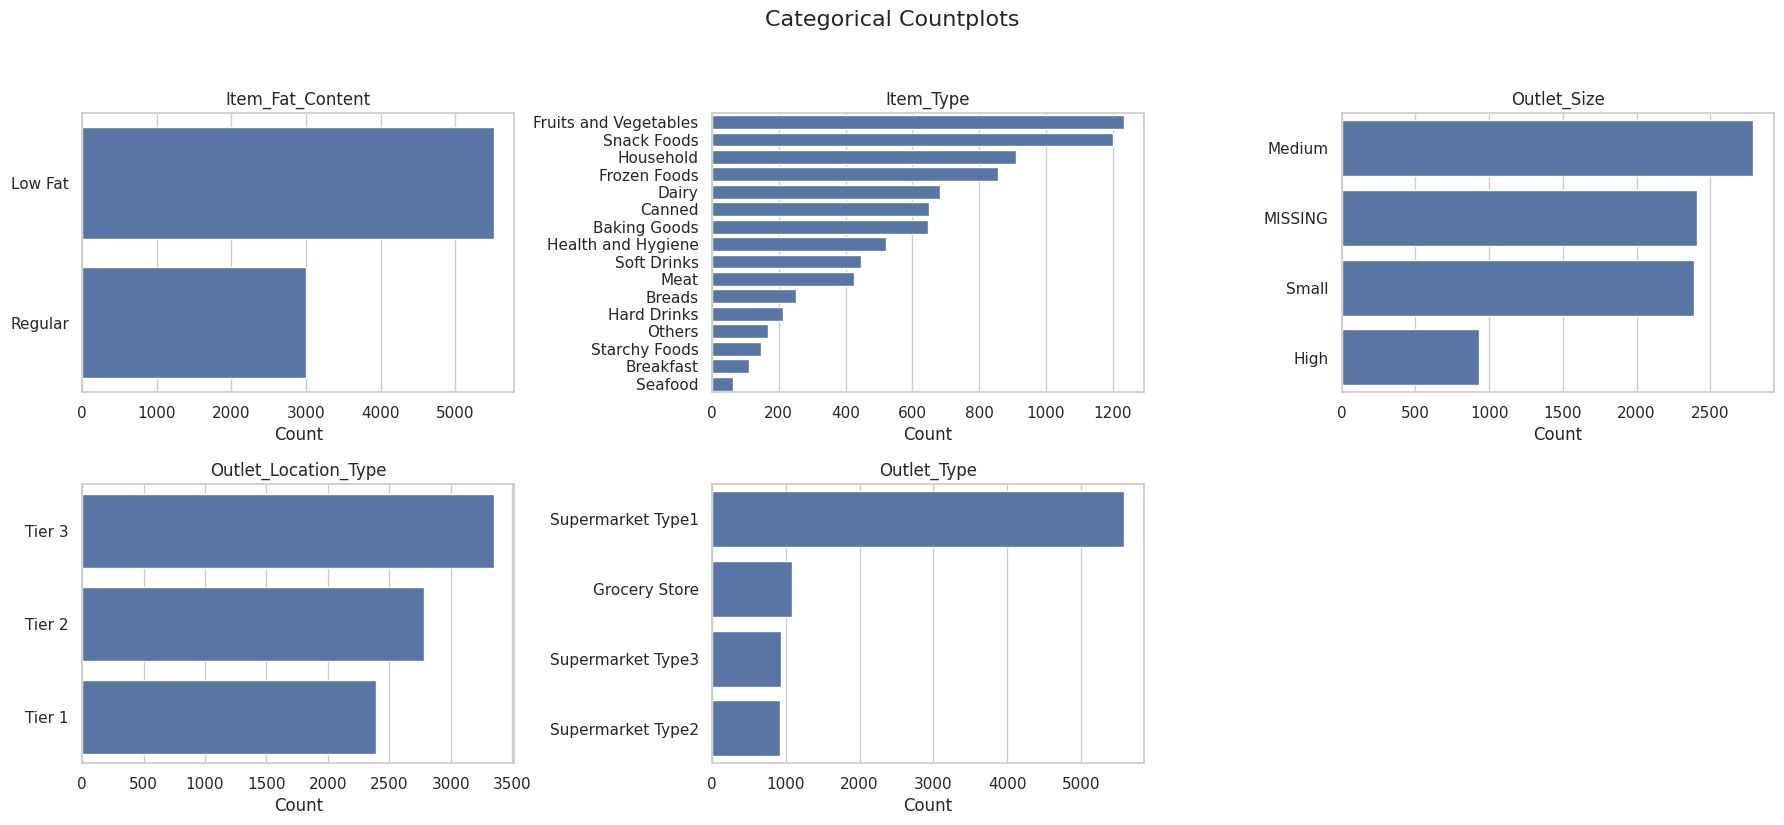

In [225]:
cats = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
ncols, nrows = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.2*nrows))
axes = axes.ravel()

for i, col in enumerate(cats):
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order, ax=axes[i])
    axes[i].set_xlabel("Count"); axes[i].set_ylabel("")
    axes[i].set_title(col)

# hide any empty axes
for ax in axes[len(cats):]:
    ax.axis("off")

fig.suptitle("Categorical Countplots", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # keeps suptitle visible
plt.show()


Based on the category counts, the best features to plot against the target Item_Outlet_Sales are Outlet_Type, Outlet_Size, Outlet_Location_Type, and Item_Type. Store format (Outlet_Type) is very imbalanced and we already saw it separate sales well, so it’s the top pick. Store size and location tier likely shift footfall and capacity, so they can change typical sales levels too. Item_Type captures product mix differences that often affect demand. Item_Fat_Content has only two classes and usually shows little sales separation, so we keep it as a quick check but not a headline plot.

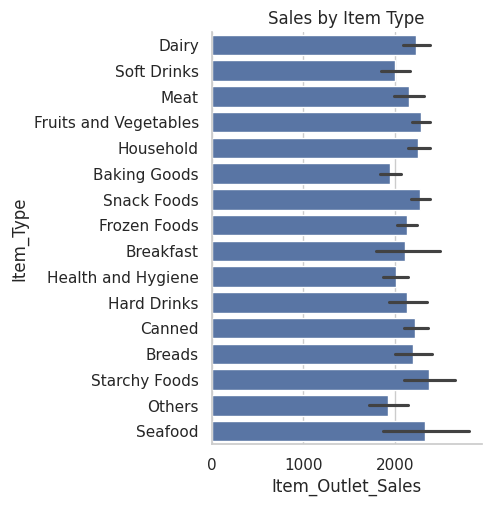

In [241]:
#barplot for Item_types
sns.catplot(data=df, y='Item_Type', x='Item_Outlet_Sales',kind='bar' ,aspect=1).set(title='Sales by Item Type');

This chart compares the average sales for each product category. Most categories sit close together (around ~1.8k–2.3k), so differences aren’t huge. A few types look higher than average—notably Starchy Foods and Seafood—while Breads, Canned, and Hard Drinks are on the lower side. Overall, item category does matter a bit, but the effect is moderate; it’s worth keeping as a feature and maybe checking with medians/boxplots or by store type to see clearer gaps.

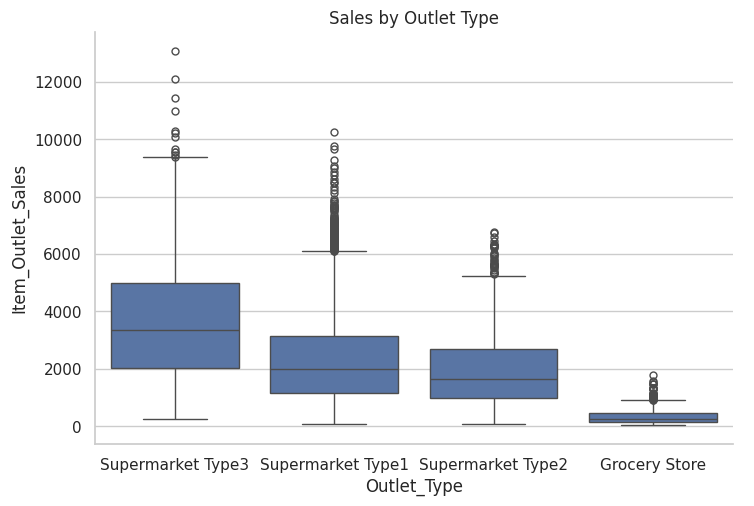

In [237]:
#boxplot for Outlet_Type
order = (df.groupby('Outlet_Type')['Item_Outlet_Sales']
           .median().sort_values(ascending=False).index)

sns.catplot( data=df, x='Outlet_Type', y='Item_Outlet_Sales', kind='box', order=order, aspect=1.5).set(title='Sales by Outlet Type');


Supermarket Type3 has the highest typical sales (highest median) and the widest spread with many big outliers; some stores sell a lot. Supermarket Type1 and Type2 sit in the middle, while Grocery Store has the lowest median and a tight spread. This means outlet type strongly affects sales, so it’s an important feature.

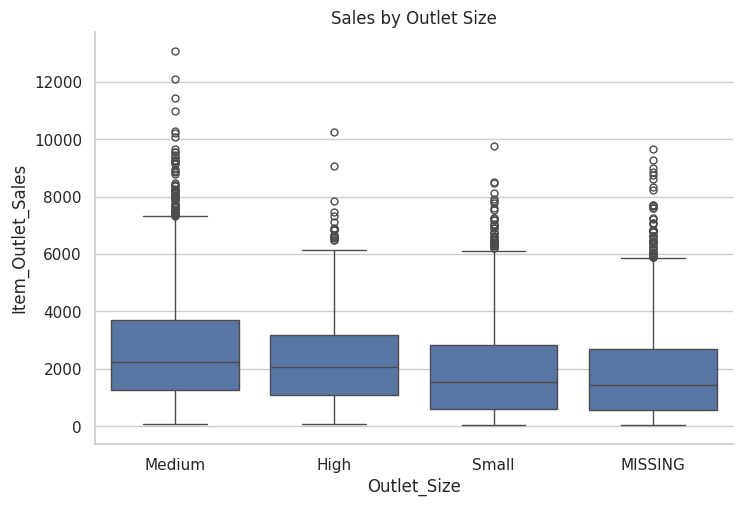

In [239]:
#boxplot for Outlet_Size
order = (df.groupby('Outlet_Size')['Item_Outlet_Sales']
           .median().sort_values(ascending=False).index)

sns.catplot( data=df, x='Outlet_Size', y='Item_Outlet_Sales', kind='box', order=order, aspect=1.5).set(title='Sales by Outlet Size');


Medium outlets have the highest typical sales (highest median). High comes next, while Small and MISSING show lower medians. All sizes have a wide spread with many high outliers, so size isn’t the only driver—but there’s a clear pattern that bigger stores tend to sell more, especially medium-sized ones. Conclusion: Outlet_Size is useful, though likely weaker than Outlet_Type; it’s worth keeping.

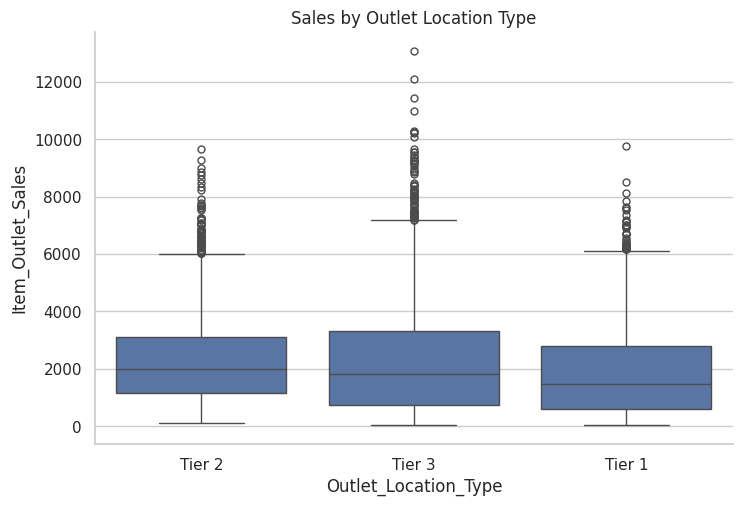

In [242]:
#boxplot for Outlet_Location_Type
order = (df.groupby('Outlet_Location_Type')['Item_Outlet_Sales']
           .median().sort_values(ascending=False).index)

sns.catplot( data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', kind='box', order=order, aspect=1.5).set(title='Sales by Outlet Location Type');


Stores in Tier 2 areas have the highest typical sales, Tier 3 is close behind, and Tier 1 has the lowest median. The boxes overlap a lot and all tiers have many high outliers, so location affects sales but the effect is moderate andweaker than Outlet_Type.

# Conclusions from our EDA

Our EDA says the strongest numeric driver of sales is price (Item_MRP): as price goes up, we see more high-sales rows (moderate positive correlation). Shelf visibility shows only a very weak negative link, and weight is basically not related to sales. On the categorical side, Outlet_Type matters a lot: Supermarket formats (especially Type3) sell the most, while Grocery Stores are lowest. Outlet_Size also helps (Medium/High stores sell more than Small/Unknown), and Outlet_Location_Type shows a smaller effect (Tier2 ≳ Tier3 > Tier1). Item_Type has moderate differences (some categories like Starchy Foods/Seafood do better, others like Breads/Canned lower). This pattern makes real-world sense: bigger, supermarket-style stores in busier areas have more footfall and assortment, so they move more units; higher-priced items often mean larger packs or premium goods, so each sale brings in more revenue; product category and store format together shape demand.

## Feature Inspection